# Задание 4. Сравнительный анализ различных моделей для предсказания деменции

### Использовать набор данных Dementia Prediction Dataset.
### Подготовить данные.

In [1]:
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('datasets/dementia_dataset.csv')
data

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


### Целевую колонку Group привести к числовому виду. При наличии значений NaNзаменить их на средние значения для данных колонок по группам.

In [3]:
data['Group'] = data['Group'].map({'Nondemented': 0, 'Demented': 1})
data

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,0.0,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,0.0,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,1.0,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,1.0,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,1.0,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,1.0,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,1.0,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,0.0,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,0.0,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


### Построить матрицу графиков для набора данных, содержащую зависимости между разными переменными, используя функцию Seaborn Plot библиотеки Seaborn. Подробнее Парный график Seaborn в Python для визуализации данных.

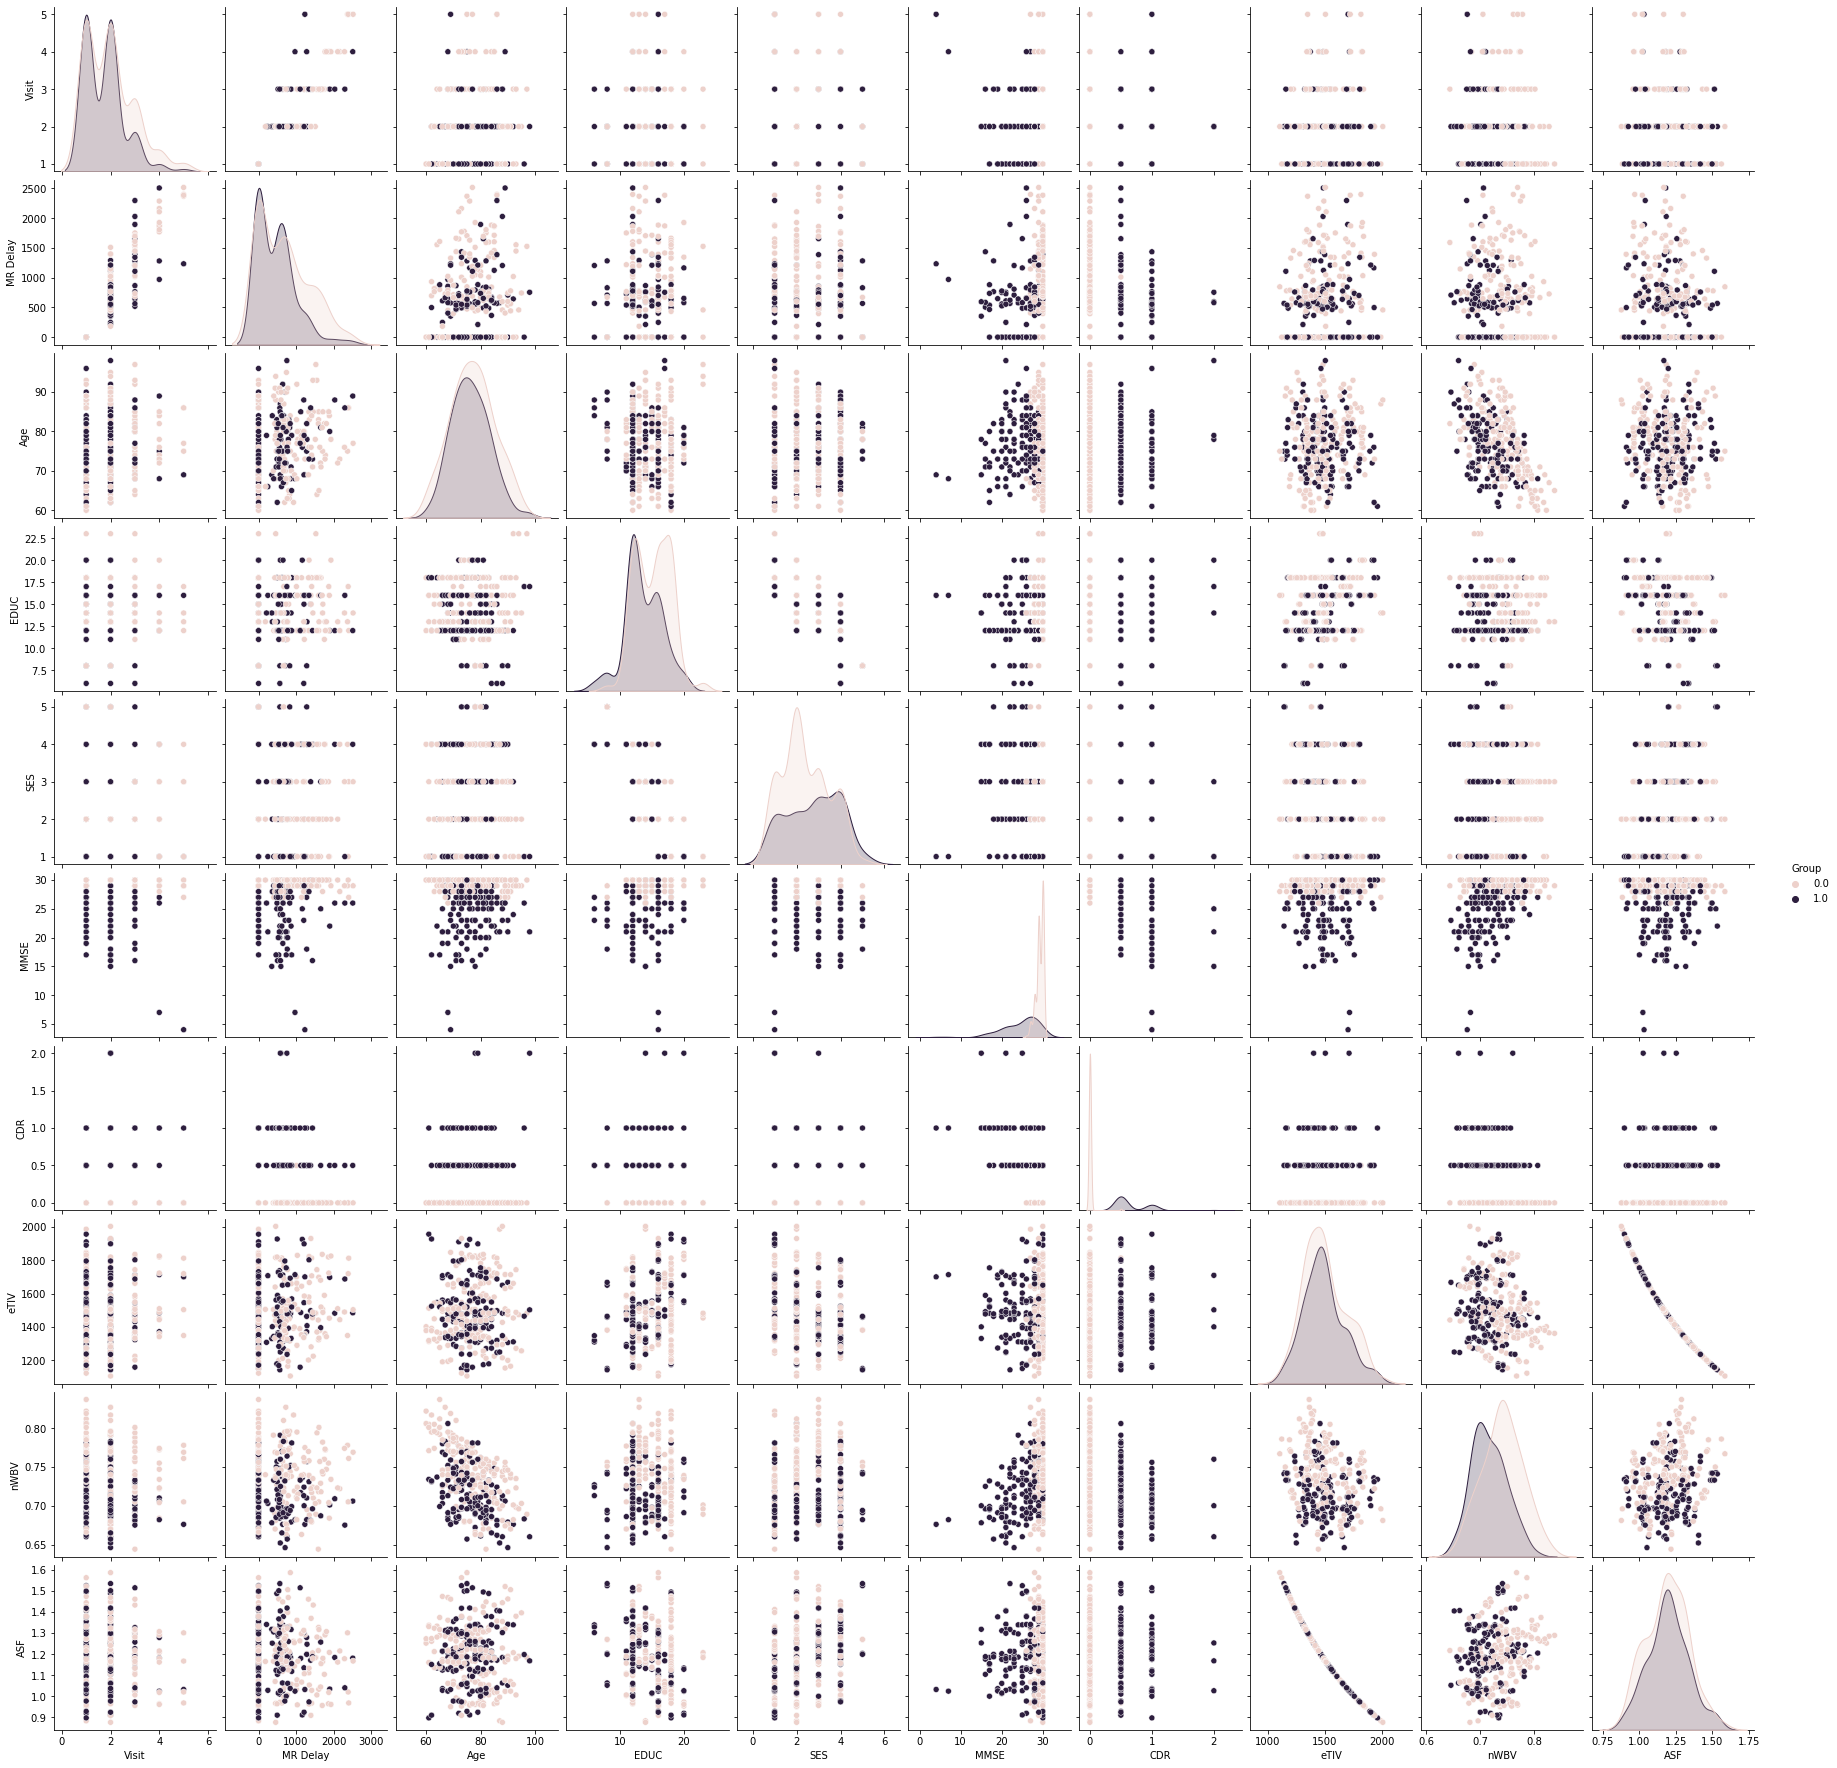

In [4]:
sns.pairplot(data, hue='Group')
plt.show()

### Построить графики для некоторых измерений, например Age, M/F, ASF, сгруппированных по классу пациента. 

<AxesSubplot:xlabel='Age', ylabel='Group'>

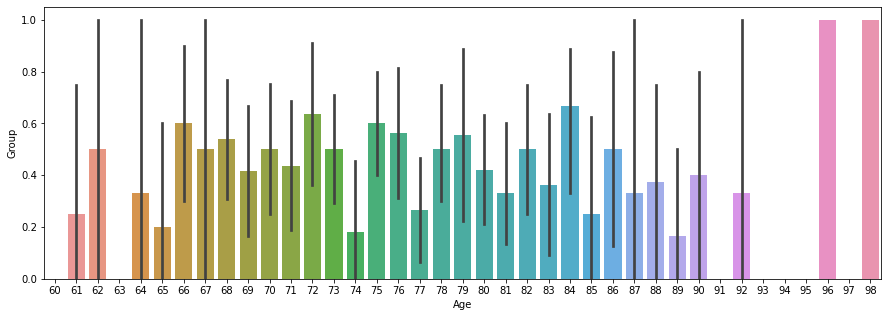

In [5]:
plt.figure(figsize=(15,5))
sns.barplot(x='Age', y='Group', data=data)

<AxesSubplot:xlabel='M/F', ylabel='Group'>

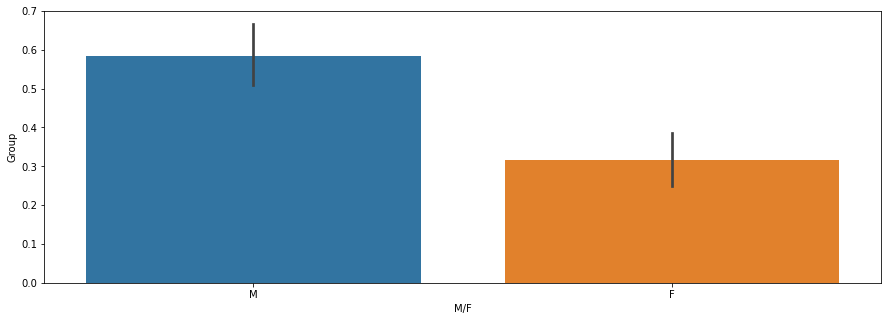

In [6]:
plt.figure(figsize=(15,5))
sns.barplot(x='M/F', y='Group', data=data)

<AxesSubplot:xlabel='ASF', ylabel='Group'>

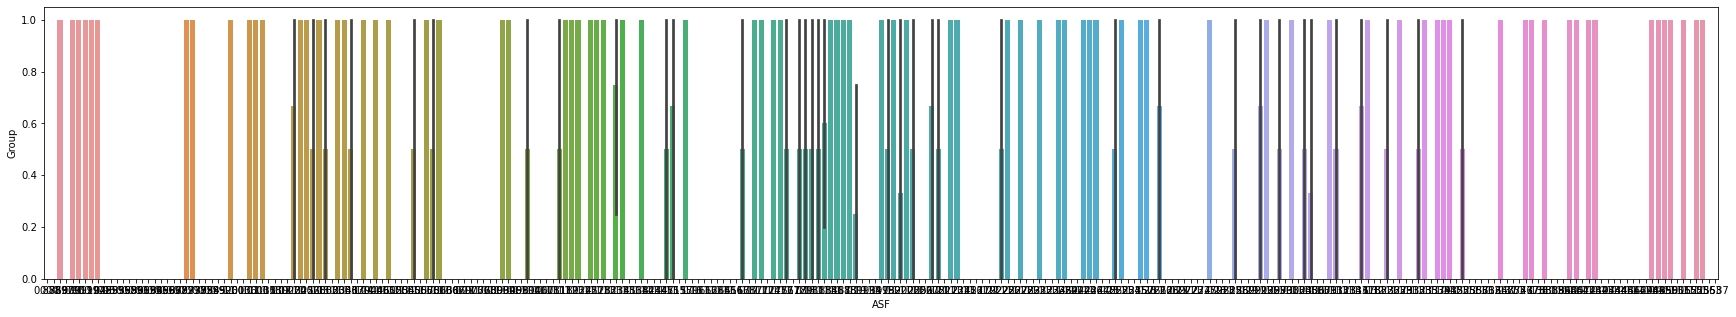

In [7]:
plt.figure(figsize=(30,5))
sns.barplot(x='ASF', y='Group', data=data)

<AxesSubplot:xlabel='EDUC', ylabel='Group'>

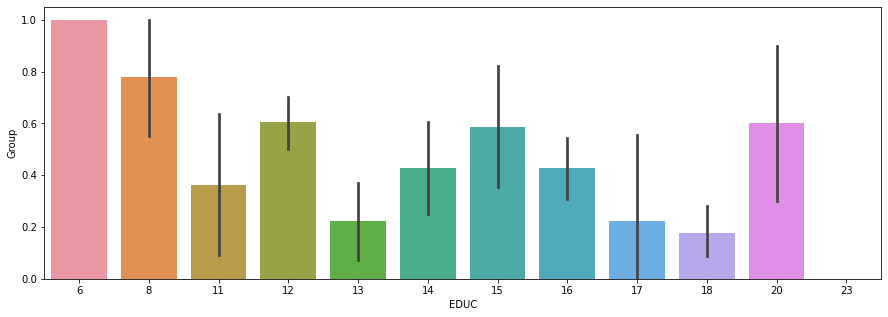

In [8]:
plt.figure(figsize=(15,5))
sns.barplot(x='EDUC', y='Group', data=data)

## Реализовать и сравнить алгоритмы:

### Наивный Байесовский классификатор

In [16]:
%%time
from sklearn.datasets import load_iris
from scipy.stats import norm
 
data = load_iris()
X, y, column_names = data['data'], data['target'], data['feature_names']
X = pd.DataFrame(X, columns = column_names)
 
### Разбиваем данные
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=44)
 
means = X_train.groupby(y_train).apply(np.mean)
stds = X_train.groupby(y_train).apply(np.std)

### Вычисляем априорную вероятность класса
probs = X_train.groupby(y_train).apply(lambda x: len(x)) / X_train.shape[0]
 
### Вычисляем вероятность для Теоремы Байеса для каждого элемента
y_pred = []
# каждый элемент в валидационной части данных
for elem in range(X_val.shape[0]):
   p = {}
 
   # для каждого возможного класса
   for cl in np.unique(y_train):
 
       # априорная вероятность взятого ранее класса
       p[cl] = probs.iloc[cl]
 
       # для каждого столбца в датасете
       for index, param in enumerate(X_val.iloc[elem]):
 
           # умножаем вероятность того, что данное значение столбца
           # будет принадлежать распределению для выбранного класса
           p[cl] *= norm.pdf(param, means.iloc[cl, index], stds.iloc[cl, index])
  
   y_pred.append(pd.Series(p).values.argmax())
 
### Посмотрим точность нашего предсказания несколькими методами
# ручной классификатор
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y_val, y_pred)
accuracy1

CPU times: user 215 ms, sys: 3.83 ms, total: 218 ms
Wall time: 233 ms


0.9210526315789473

### K-nearest neighbors

In [10]:
class KNearestNeighbors:
    def __init__(self, n_neighbors):
        self.ty = None
        self.tX = None
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.tX = X
        self.ty = y

    def predict(self, X):
        # count of iterations (points)
        num_training = X.shape[0]
        # initialize array of predicted values
        prediction = np.zeros(num_training, dtype=self.ty.dtype)

        for i in range(num_training):
            # count distances between train points and test points
            distances = np.sqrt(np.sum(np.square(self.tX - X[i, :]), axis=1))
            # create array to store both distance and 'class'
            distance_label = np.column_stack((distances, self.ty))
            # sort by distances
            sorted_distance = distance_label[distance_label[:, 0].argsort()]
            # take k sorted distances
            k_sorted_distance = sorted_distance[:self.n_neighbors, :]
            # count occurences of each class
            (labels, occurence) = np.unique(k_sorted_distance[:, 1], return_counts=True)
            # add predicted class
            ind = np.where(occurence == np.amax(occurence))[0]
            if ind.shape:
                ind = ind[0]
            label = labels[ind]
            prediction[i] = label

        return prediction

In [17]:
%%time
from sklearn.datasets import load_wine

knn1 = KNearestNeighbors(7)
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)
 
knn1.fit(X_train, y_train)

y_pred = knn1.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.5925925925925926
CPU times: user 11.3 ms, sys: 3.91 ms, total: 15.2 ms
Wall time: 17.7 ms


### Linear discriminant analysis

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [27]:
%%time
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))  

0.970940170940171
CPU times: user 109 ms, sys: 8.18 ms, total: 117 ms
Wall time: 91.2 ms


### Логистическая регрессия

In [30]:
from sklearn.linear_model import LogisticRegression

In [34]:
%%time
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

pred = logisticRegr.predict(X_test)
accuracy_score(pred, y_test)

CPU times: user 52.9 ms, sys: 165 µs, total: 53 ms
Wall time: 70.7 ms


0.8888888888888888

### Случайный лес

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=17)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=17)

In [21]:
%%time
forest_predictions = rf.predict(X_test)
accuracy_score(forest_predictions, y_test)

CPU times: user 27 ms, sys: 0 ns, total: 27 ms
Wall time: 36.3 ms


0.9629629629629629